In [97]:
import os

# Set the working directory to the folder containing your data
workplace_dir = '/Users/scarlett/Library/Mobile Documents/com~apple~CloudDocs/UVA/25F/AI for digital health/Mindscape Data'
os.chdir(workplace_dir)

# Verify the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/scarlett/Library/Mobile Documents/com~apple~CloudDocs/UVA/25F/AI for digital health/Mindscape Data


In [98]:
import pandas as pd

# Load the CSV file
file_path = 'apps.csv'
df = pd.read_csv(file_path)

# Display basic info and first few rows
print(df.head())

   Unnamed: 0                                               data  \
0           0  ["com.google.android.networkstack.tethering",0,0]   
1           1       ["edu.dartmouth.mlife",1704767443784,723154]   
2           2        ["com.android.vending",1704765202811,21794]   
3           3          ["com.google.android.gm",1704763495662,0]   
4           4  ["com.google.android.permissioncontroller",170...   

                          day             uid  
0         1969-12-31 14:00:00  t0001@sreflect  
1  2024-01-08 16:30:43.753000  t0001@sreflect  
2  2024-01-08 15:53:22.749000  t0001@sreflect  
3  2024-01-08 15:24:55.661000  t0001@sreflect  
4  2024-01-08 16:24:21.614000  t0001@sreflect  


In [99]:
import ast
def parse_data(s):
    try:
        lst = ast.literal_eval(s)
        return pd.Series({
            'app_pkg': lst[0],
            'timestamp': lst[1],
            'duration': lst[2]
        })
    except:
        return pd.Series({'app_pkg': None, 'timestamp': None, 'duration': None})
    
df_parsed = df.join(df['data'].apply(parse_data))
df_parsed['duration_sec'] = df_parsed['duration'] / 1000.0
df_parsed['day'] = pd.to_datetime(df_parsed['day'], errors='coerce')
system_patterns = [
    'android.permission', 'android.networkstack', 'android.settings',
    'packageinstaller', 'nexuslauncher', 'tethering', 'android.systemui'
]
pattern = '|'.join(system_patterns)
df_parsed = df_parsed[~df_parsed['app_pkg'].str.contains(pattern, na=False)]
df_parsed = df_parsed[df_parsed['duration_sec'] > 0]
cleaned = df_parsed[['uid', 'app_pkg', 'duration_sec', 'day']].reset_index(drop=True)
cleaned.to_csv("apps_cleaned.csv", index=False)
print(cleaned)

                   uid                          app_pkg  duration_sec day
0       t0001@sreflect              edu.dartmouth.mlife       723.154 NaT
1       t0001@sreflect              com.android.vending        21.794 NaT
2       t0001@sreflect              edu.dartmouth.mlife       378.674 NaT
3       t0001@sreflect              edu.dartmouth.mlife       667.449 NaT
4       t0001@sreflect              edu.dartmouth.mlife       181.407 NaT
...                ...                              ...           ...  ..
152456  t0001@sreflect               com.android.chrome       125.819 NaT
152457  t0001@sreflect         com.zhiliaoapp.musically     12852.822 NaT
152458  t0001@sreflect                com.facebook.orca      4307.891 NaT
152459  t0001@sreflect             com.linkedin.android       100.001 NaT
152460  t0001@sreflect  com.google.android.GoogleCamera       177.704 NaT

[152461 rows x 4 columns]


In [100]:
audio_map_df = pd.read_csv('audio_map.csv')
print(audio_map_df.head())

   Unnamed: 0                     date filename             uid
0           0  2024-01-08 16:03:23.196    1.mp3  t0001@sreflect
1           1  2024-01-08 16:29:11.242    2.mp3  t0001@sreflect
2           2  2024-01-08 19:54:18.267    3.mp3  t0001@sreflect
3           3  2024-01-08 19:55:28.223    4.mp3  t0001@sreflect
4           4  2024-01-08 19:57:46.056    5.mp3  t0001@sreflect


In [101]:
ema_exports_df = pd.read_csv('ema_exports.csv')
print(ema_exports_df.head())

   Unnamed: 0                                               data  \
0           0  {"Q1":"5","__name__":"daily_weekday","RespTime...   
1           1  {"Q1":"2","__name__":"daily_weekday","RespTime...   
2           2  {"Q1":"1","__name__":"daily_weekday","RespTime...   
3           3  {"Q1":"1","__name__":"daily_weekday","RespTime...   
4           4  {"Q1":"4","__name__":"daily_weekday","RespTime...   

                       day             uid  
0  2024-01-08 16:03:23.196  t0001@sreflect  
1  2024-01-08 16:18:35.558  t0001@sreflect  
2  2024-01-08 16:29:11.242  t0001@sreflect  
3  2024-01-08 19:54:18.267  t0001@sreflect  
4  2024-01-08 19:55:28.223  t0001@sreflect  


In [102]:
import json

# Function to clean EMA data and extract relevant fields
def clean_ema_data(df):
    records = []
    for _, row in df.iterrows():
        try:
            data_dict = json.loads(row['data'])
        except Exception:
            continue  # skip rows with invalid JSON
        record = {
            'uid': row['uid'],
            'day': row['day'],
        }
        # Extract Q1-Q4 if present
        for q in ['Q1', 'Q2', 'Q3', 'Q4']:
            record[q] = data_dict.get(q, None)
        # Optionally add __name__ or other fields
        record['__name__'] = data_dict.get('__name__', None)
        records.append(record)
    return pd.DataFrame(records)

cleaned_ema_df = clean_ema_data(ema_exports_df)
print(cleaned_ema_df.head())

              uid                      day Q1    Q2    Q3    Q4       __name__
0  t0001@sreflect  2024-01-08 16:03:23.196  5  None  None  None  daily_weekday
1  t0001@sreflect  2024-01-08 16:18:35.558  2  None  None  None  daily_weekday
2  t0001@sreflect  2024-01-08 16:29:11.242  1  None  None  None  daily_weekday
3  t0001@sreflect  2024-01-08 19:54:18.267  1  None  None  None  daily_weekday
4  t0001@sreflect  2024-01-08 19:55:28.223  4  None  None  None  daily_weekday


In [103]:
# Load the feat_dataset.csv file into a DataFrame
feat_dataset_df = pd.read_csv('feat_dataset.csv')
print(feat_dataset_df.head())

   Unnamed: 0                       _id  abs_avg_diff_reversed_ema  \
0           0  659cae39cd97dc268d810e5f                        NaN   
1           1  659cbf03cd97dc268d813c5f                        NaN   
2           2  659d2728cd97dc268d825d61                        NaN   
3           3  659dab70cd97dc268d83a562                        NaN   
4           4  659dba35cd97dc268d83d741                        NaN   

   act_in vehicle_ep_0  act_in vehicle_ep_1  act_in vehicle_ep_2  \
0                    0                    0                    0   
1                    0                    0                    0   
2                 2765                    0                 1680   
3                  323                    0                    0   
4                    0                    0                    0   

   act_in vehicle_ep_3  act_in vehicle_ep_4  act_in vehicle_ep_5  \
0                    0                    0                    0   
1                    0            

In [104]:
# Load the journal_prompts.csv file into a DataFrame
journal_prompts_df = pd.read_csv('journal_prompts.csv')
print(journal_prompts_df.head())

   Unnamed: 0                                               data  \
0           0  ["Audio","No manual key","No auto key","What w...   
1           1  ["Audio","No manual key","Seeing any new favor...   
2           2  ["Audio","Feeling a bit off? Reflect on one th...   
3           3  ["Audio","How did staying active today boost y...   
4           4  ["Audio","Given the stability in your habits, ...   

                       day             uid  
0  2024-01-08 16:05:50.052  t0001@sreflect  
1  2024-01-08 19:54:16.382  t0001@sreflect  
2  2024-01-08 19:55:25.769  t0001@sreflect  
3  2024-01-08 19:57:44.240  t0001@sreflect  
4  2024-01-08 19:59:20.875  t0001@sreflect  


In [105]:
# Load the text_diary_exports.csv file into a DataFrame
text_diary_exports_df = pd.read_csv('text_diary_exports.csv')
print(text_diary_exports_df.head())

   Unnamed: 0                                               data  \
0           0  dcdf. ff ffv ddd ff dfg ffv ddd ff ff dss ddd ...   
1           1  ggychhbggjhfgkurbjvfhngguuhguuuifdfffcfvcvcccf...   
2           2  totototototototototottotototoyotoyoyoyoyoyoyoy...   
3           3  does this use location data? response seeming ...   
4           4  talking about specific data points. shouldn't ...   

                       day             uid  
0  2024-01-08 20:08:15.217  t0001@sreflect  
1  2024-01-09 14:54:27.779  test4@sreflect  
2  2024-01-10 11:45:09.144  test4@sreflect  
3  2024-01-10 19:25:15.973  test4@sreflect  
4  2024-01-10 19:27:15.151  test4@sreflect  


In [106]:
entry_nos_new_df = pd.read_csv('entry_nos_new.csv')
exit_nos_new_df = pd.read_csv('exit_nos_new.csv')
entry_nos_new_df

,Unnamed: 0,uid,bfi_extraversion,bfi_agreeableness,bfi_consc,bfi_neuro,bfi_open,brs_total,erq_cognitive,erq_expressive,...,ryffs_purpose,loneliness_total,flourishing_total,ryffs_selfacceptance,ls_total,sps_total,pgis_total,sr_total,insight_total,mindfulness_total
0,0,t0002@sreflect,4,4,8,8,8,2.333333,15,17,...,4,9,42,8,24,12,16,34,28,34
1,1,t0007@sreflect,2,6,5,6,7,3.166667,7,18,...,9,6,27,8,25,18,27,13,14,40
2,2,t0006@sreflect,6,8,9,9,6,3.166667,6,5,...,5,8,51,4,23,11,21,33,37,50
3,3,t0019@sreflect,3,7,7,10,7,2.833333,8,16,...,6,9,34,8,18,19,24,27,16,45
4,4,t0003@sreflect,6,5,8,4,6,3.166667,18,9,...,5,10,51,5,18,15,19,21,29,45
5,5,t0005@sreflect,2,4,4,10,8,3.166667,12,16,...,7,12,42,14,15,20,26,34,32,36
6,6,t0015@sreflect,7,5,5,6,9,3.000000,12,18,...,7,9,37,10,15,28,21,25,18,41
7,7,t0004@sreflect,5,8,6,8,8,3.000000,16,6,...,5,8,49,6,32,20,22,42,9,39
8,8,t0016@sreflect,10,8,9,5,4,3.000000,17,3,...,3,6,52,4,30,13,20,31,26,52
9,9,t0009@sreflect,6,6,6,9,6,2.833333,15,16,...,5,9,40,8,17,21,20,35,19,37


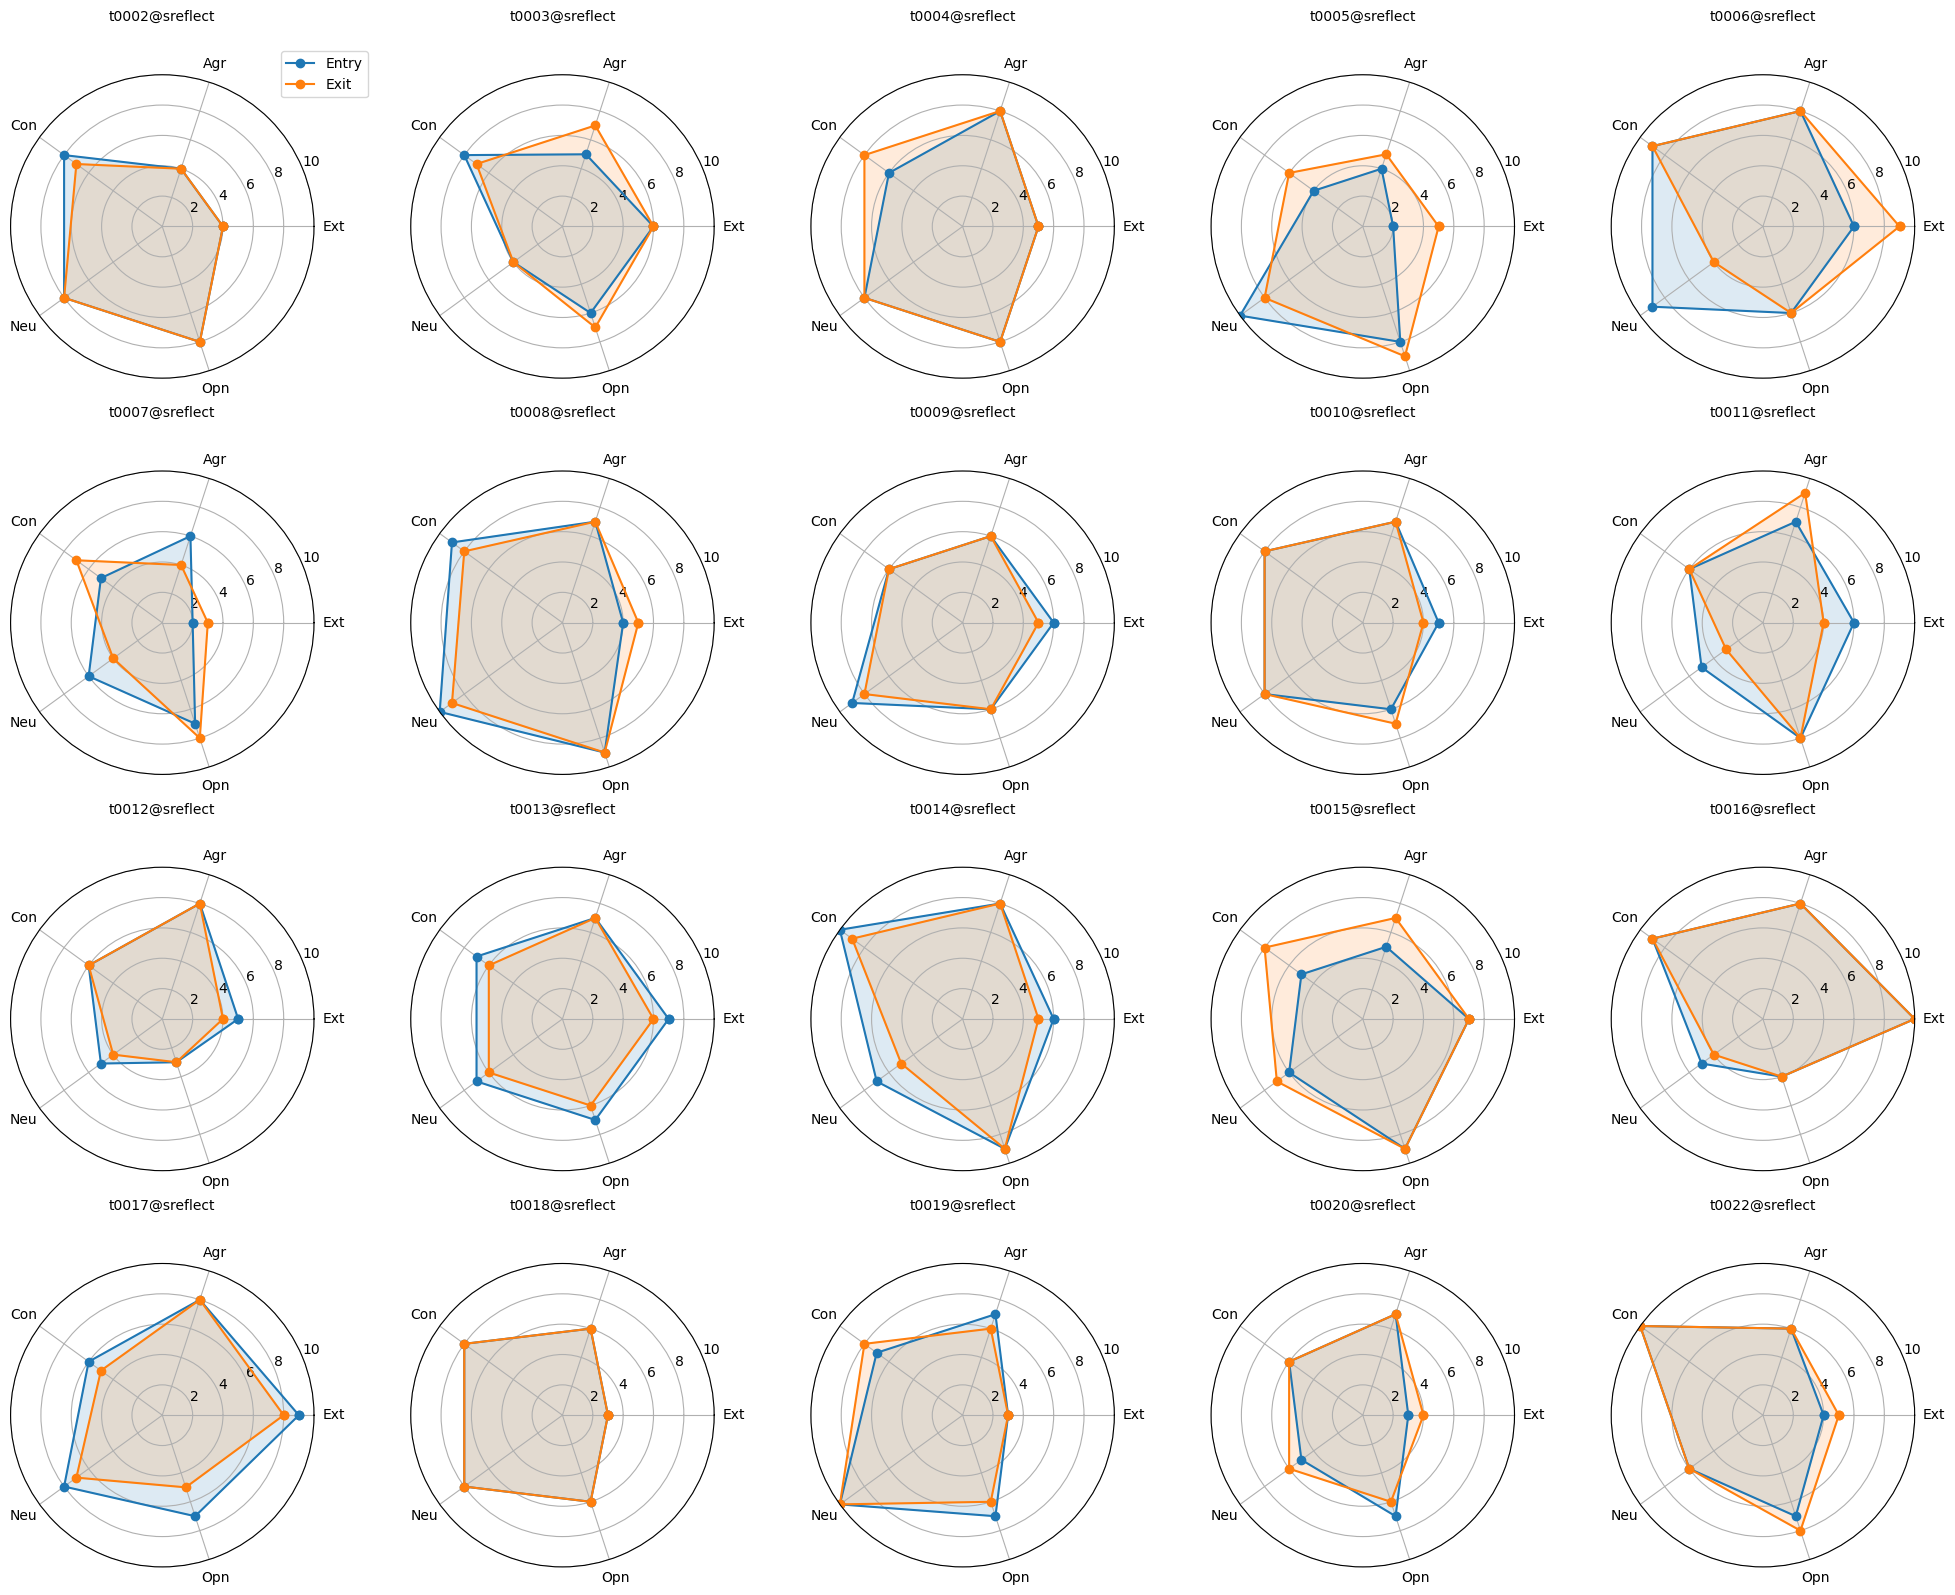

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Short labels for BFI traits
short_labels = ['Ext', 'Agr', 'Con', 'Neu', 'Opn']

# Get list of uids present in both entry and exit BFI data
uids = list(set(entry_nos_new_df['uid']).intersection(set(exit_nos_new_df['uid'])))
uids = sorted(uids)  # sort for consistent order

# Prepare entry and exit BFI data indexed by uid
entry_bfi = entry_nos_new_df.set_index('uid')[['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']]
exit_bfi = exit_nos_new_df.set_index('uid')[['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']]

angles = np.linspace(0, 2 * np.pi, len(short_labels), endpoint=False).tolist()
angles += angles[:1]  # close the radar

fig, axes = plt.subplots(4, 5, figsize=(20, 16), subplot_kw=dict(polar=True))
axes = axes.flatten()

for idx, uid in enumerate(uids):
    ax = axes[idx]
    entry_vals = entry_bfi.loc[uid].values.tolist()
    exit_vals = exit_bfi.loc[uid].values.tolist()
    entry_vals += entry_vals[:1]
    exit_vals += exit_vals[:1]
    ax.plot(angles, entry_vals, 'o-', label='Entry', color='tab:blue')
    ax.fill(angles, entry_vals, alpha=0.15, color='tab:blue')
    ax.plot(angles, exit_vals, 'o-', label='Exit', color='tab:orange')
    ax.fill(angles, exit_vals, alpha=0.15, color='tab:orange')
    ax.set_title(uid, y=1.15, fontsize=10)
    ax.set_thetagrids(np.degrees(angles[:-1]), short_labels)
    ax.set_ylim(0, 10)
    if idx == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
for j in range(len(uids), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [108]:
# Compute the mean of entry and exit BFI data for each user
entry_bfi = entry_nos_new_df.set_index('uid')[['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']]
exit_bfi = exit_nos_new_df.set_index('uid')[['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']]

# Align indices and calculate the mean
common_uids = entry_bfi.index.intersection(exit_bfi.index)
entry_exit_bfi_mean = (entry_bfi.loc[common_uids] + exit_bfi.loc[common_uids]) / 2

print(entry_exit_bfi_mean)

                bfi_extraversion  bfi_agreeableness  bfi_consc  bfi_neuro  \
uid                                                                         
t0002@sreflect               4.0                4.0        7.5        8.0   
t0007@sreflect               2.5                5.0        6.0        5.0   
t0006@sreflect               7.5                8.0        9.0        6.5   
t0019@sreflect               3.0                6.5        7.5       10.0   
t0003@sreflect               6.0                6.0        7.5        4.0   
t0005@sreflect               3.5                4.5        5.0        9.0   
t0015@sreflect               7.0                6.0        6.5        6.5   
t0004@sreflect               5.0                8.0        7.0        8.0   
t0016@sreflect              10.0                8.0        9.0        4.5   
t0009@sreflect               5.5                6.0        6.0        8.5   
t0008@sreflect               4.5                7.0        8.5        9.5   

### ERQ-Cognitive Reappraisal
- **Definition:** Measures how often a person reinterprets a situation to change its emotional impact.
- **Interpretation:**
    - **Higher score:** Indicates better emotion regulation, greater use of adaptive and healthy strategies. Generally linked to higher well-being and lower stress.
    - **Lower score:** Suggests poorer emotion regulation or less use of cognitive coping strategies.

### ERQ-Expressive Suppression
- **Definition:** Measures how often a person hides or inhibits emotional expression .
- **Interpretation:**
    - **Higher score:** Reflects more suppression and emotional inhibition, which can reduce well-being and increase stress if overused.
    - **Lower score:** Indicates more open expression of emotions, which is usually healthier in the long run.

In [109]:
# Calculate the change in erq_cognitive and erq_expressive between entry and exit for each user
entry_erq = entry_nos_new_df.set_index('uid')[['erq_cognitive', 'erq_expressive']]
exit_erq = exit_nos_new_df.set_index('uid')[['erq_cognitive', 'erq_expressive']]

# Align indices to users present in both entry and exit
common_uids = entry_erq.index.intersection(exit_erq.index)
erq_change = exit_erq.loc[common_uids] - entry_erq.loc[common_uids]
erq_change = erq_change.rename(columns=lambda x: f"{x}_change")
erq_change['total_erq_change'] = erq_change['erq_cognitive_change'] - erq_change['erq_expressive_change']
erq_change


,erq_cognitive_change,erq_expressive_change,total_erq_change
uid,,,
t0002@sreflect,0,-2,2
t0007@sreflect,2,-1,3
t0006@sreflect,11,15,-4
t0019@sreflect,4,3,1
t0003@sreflect,-9,3,-12
t0005@sreflect,-6,-8,2
t0015@sreflect,3,-4,7
t0004@sreflect,-3,7,-10
t0016@sreflect,-2,2,-4


Positive ERQ total change users (n=11): ['t0002@sreflect', 't0007@sreflect', 't0019@sreflect', 't0005@sreflect', 't0015@sreflect', 't0008@sreflect', 't0012@sreflect', 't0010@sreflect', 't0013@sreflect', 't0020@sreflect', 't0022@sreflect']
Negative/No ERQ total change users (n=9): ['t0006@sreflect', 't0003@sreflect', 't0004@sreflect', 't0016@sreflect', 't0009@sreflect', 't0014@sreflect', 't0011@sreflect', 't0018@sreflect', 't0017@sreflect']


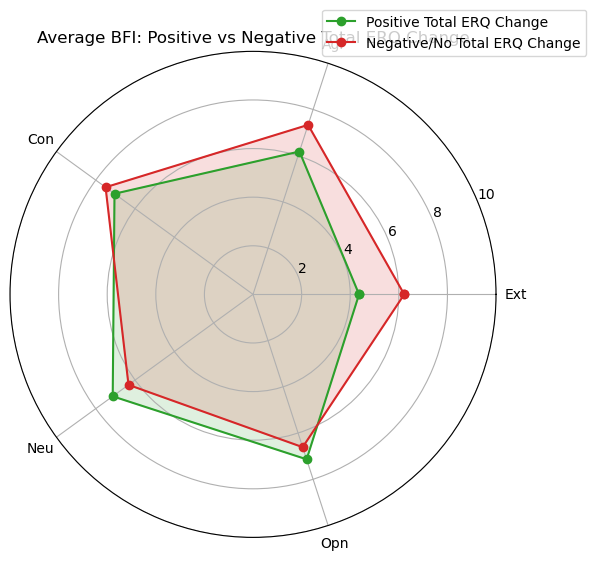

In [110]:
# Determine users with positive and negative/no total ERQ change
positive_erq_uids = erq_change[erq_change['total_erq_change'] > 0].index
negative_erq_uids = erq_change[erq_change['total_erq_change'] <= 0].index

# Compute average BFI for each group using entry_exit_bfi_mean
positive_erq_bfi_mean = entry_exit_bfi_mean.loc[positive_erq_uids].mean()
negative_erq_bfi_mean = entry_exit_bfi_mean.loc[negative_erq_uids].mean()

print(f"Positive ERQ total change users (n={len(positive_erq_uids)}): {list(positive_erq_uids)}")
print(f"Negative/No ERQ total change users (n={len(negative_erq_uids)}): {list(negative_erq_uids)}")

# Prepare data for radar chart
labels = ['Ext', 'Agr', 'Con', 'Neu', 'Opn']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = positive_erq_bfi_mean.values.tolist()
neg_vals = negative_erq_bfi_mean.values.tolist()
pos_vals += pos_vals[:1]
neg_vals += neg_vals[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='Positive Total ERQ Change', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Negative/No Total ERQ Change', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Average BFI: Positive vs Negative Total ERQ Change')
plt.tight_layout()
plt.show()

## Positive and Negative Affect Schedule (PANAS-SF)

In [111]:
# Calculate the change in panas_positive and panas_negative between entry and exit for each user
entry_panas = entry_nos_new_df.set_index('uid')[['panas_positive', 'panas_negative']]
exit_panas = exit_nos_new_df.set_index('uid')[['panas_positive', 'panas_negative']]

# Align indices to users present in both entry and exit
common_uids = entry_panas.index.intersection(exit_panas.index)
panas_change = exit_panas.loc[common_uids] - entry_panas.loc[common_uids]
panas_change = panas_change.rename(columns=lambda x: f"{x}_change")
panas_change['total_panas_change'] = panas_change['panas_positive_change'] - panas_change['panas_negative_change']
panas_change

,panas_positive_change,panas_negative_change,total_panas_change
uid,,,
t0002@sreflect,-3,0,-3
t0007@sreflect,7,-9,16
t0006@sreflect,12,-5,17
t0019@sreflect,-3,0,-3
t0003@sreflect,-6,-5,-1
t0005@sreflect,9,-7,16
t0015@sreflect,-1,-8,7
t0004@sreflect,1,-9,10
t0016@sreflect,6,-1,7


Positive PANAS total change users (n=13): ['t0007@sreflect', 't0006@sreflect', 't0005@sreflect', 't0015@sreflect', 't0004@sreflect', 't0016@sreflect', 't0009@sreflect', 't0008@sreflect', 't0012@sreflect', 't0010@sreflect', 't0018@sreflect', 't0020@sreflect', 't0017@sreflect']
Negative/No PANAS total change users (n=7): ['t0002@sreflect', 't0019@sreflect', 't0003@sreflect', 't0014@sreflect', 't0011@sreflect', 't0013@sreflect', 't0022@sreflect']


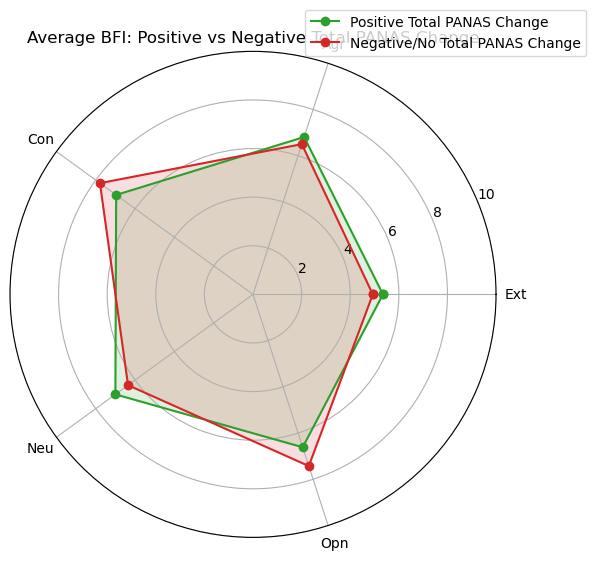

In [112]:
# Determine PANAS groups and plot radar chart of average BFI
if 'positive_panas_uids' not in globals() or 'negative_panas_uids' not in globals():
    positive_panas_uids = panas_change[panas_change['total_panas_change'] > 0].index
    negative_panas_uids = panas_change[panas_change['total_panas_change'] <= 0].index

if 'positive_panas_bfi_mean' not in globals() or 'negative_panas_bfi_mean' not in globals():
    positive_panas_bfi_mean = entry_exit_bfi_mean.loc[positive_panas_uids].mean()
    negative_panas_bfi_mean = entry_exit_bfi_mean.loc[negative_panas_uids].mean()

print(f"Positive PANAS total change users (n={len(positive_panas_uids)}): {list(positive_panas_uids)}")
print(f"Negative/No PANAS total change users (n={len(negative_panas_uids)}): {list(negative_panas_uids)}")

radar_labels = short_labels if 'short_labels' in globals() else ['Ext', 'Agr', 'Con', 'Neu', 'Opn']
angles = np.linspace(0, 2 * np.pi, len(radar_labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = positive_panas_bfi_mean.values.tolist()
neg_vals = negative_panas_bfi_mean.values.tolist()
pos_vals += pos_vals[:1]
neg_vals += neg_vals[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='Positive Total PANAS Change', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Negative/No Total PANAS Change', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), radar_labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Average BFI: Positive vs Negative Total PANAS Change')
plt.tight_layout()
plt.show()

## Stress & Anxiety


Perceived stress 

State-trait anxiety 

Resilience 

In [113]:
# Calculate the change in pss_total, stai_total, and brs_total between entry and exit for each user
entry_stress = entry_nos_new_df.set_index('uid')[['pss_total', 'stai_total', 'brs_total']]
exit_stress = exit_nos_new_df.set_index('uid')[['pss_total', 'stai_total', 'brs_total']]

# Align indices to users present in both entry and exit
common_uids = entry_stress.index.intersection(exit_stress.index)
stress_change = exit_stress.loc[common_uids] - entry_stress.loc[common_uids]
stress_change = stress_change.rename(columns=lambda x: f"{x}_change")
stress_change['total_stress_release'] = - stress_change['pss_total_change']*100/16 - stress_change['stai_total_change']*100/80 + stress_change['brs_total_change']*100/5
stress_change

,pss_total_change,stai_total_change,brs_total_change,total_stress_release
uid,,,,
t0002@sreflect,-2,-10.000000,0.666667,38.333333
t0007@sreflect,-1,-20.000000,-0.333333,24.583333
t0006@sreflect,-5,-10.000000,-0.333333,37.083333
t0019@sreflect,-2,-6.666667,0.166667,24.166667
t0003@sreflect,6,-13.333333,0.666667,-7.500000
t0005@sreflect,-5,-16.666667,-0.166667,48.750000
t0015@sreflect,-3,-6.666667,-0.166667,23.750000
t0004@sreflect,1,20.000000,0.000000,-31.250000
t0016@sreflect,-5,-3.333333,0.000000,35.416667


Positive total stress change users (n=12): ['t0002@sreflect', 't0007@sreflect', 't0006@sreflect', 't0019@sreflect', 't0005@sreflect', 't0015@sreflect', 't0016@sreflect', 't0009@sreflect', 't0012@sreflect', 't0014@sreflect', 't0018@sreflect', 't0017@sreflect']
Negative/No total stress change users (n=8): ['t0003@sreflect', 't0004@sreflect', 't0008@sreflect', 't0010@sreflect', 't0011@sreflect', 't0013@sreflect', 't0020@sreflect', 't0022@sreflect']


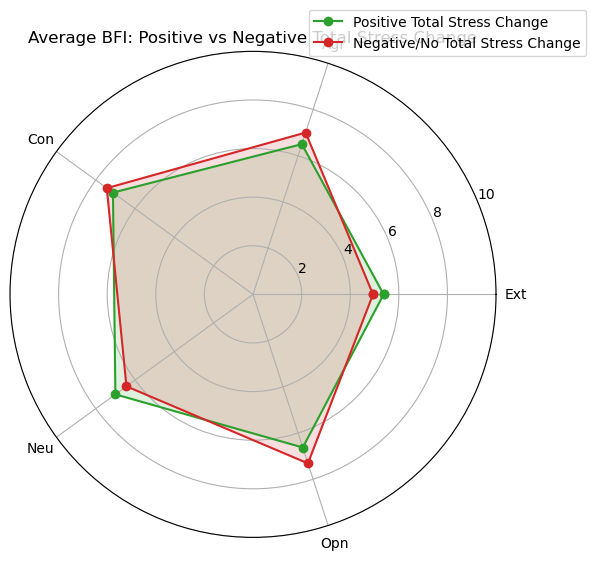

In [114]:
# Determine users with positive and negative/no total_stress_change
positive_stress_uids = stress_change[stress_change['total_stress_release'] > 0].index
negative_stress_uids = stress_change[stress_change['total_stress_release'] <= 0].index

# Compute average BFI for each group using entry_exit_bfi_mean
positive_stress_bfi_mean = entry_exit_bfi_mean.loc[positive_stress_uids].mean()
negative_stress_bfi_mean = entry_exit_bfi_mean.loc[negative_stress_uids].mean()

print(f"Positive total stress change users (n={len(positive_stress_uids)}): {list(positive_stress_uids)}")
print(f"Negative/No total stress change users (n={len(negative_stress_uids)}): {list(negative_stress_uids)}")

# Prepare data for radar chart
labels = ['Ext', 'Agr', 'Con', 'Neu', 'Opn']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = positive_stress_bfi_mean.values.tolist()
neg_vals = negative_stress_bfi_mean.values.tolist()
pos_vals += pos_vals[:1]
neg_vals += neg_vals[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='Positive Total Stress Change', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Negative/No Total Stress Change', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Average BFI: Positive vs Negative Total Stress Change')
plt.tight_layout()
plt.show()

## Psychological Wellbeing

In [115]:
# Calculate the change in psychological wellbeing measures between entry and exit for each user
entry_wellbeing = entry_nos_new_df.set_index('uid')[['ryffs_autonomy', 'ryffs_pgrowth', 'ryffs_posrelations', 'ryffs_purpose', 'ryffs_selfacceptance', 'ls_total', 'flourishing_total']]
exit_wellbeing = exit_nos_new_df.set_index('uid')[['ryffs_autonomy', 'ryffs_pgrowth', 'ryffs_posrelations', 'ryffs_purpose', 'ryffs_selfacceptance', 'ls_total', 'flourishing_total']]

# Align indices to users present in both entry and exit
common_uids = entry_wellbeing.index.intersection(exit_wellbeing.index)
wellbeing_change = exit_wellbeing.loc[common_uids] - entry_wellbeing.loc[common_uids]
wellbeing_change = wellbeing_change.rename(columns=lambda x: f"{x}_change")

# Calculate total wellbeing change (sum of all positive changes)
wellbeing_change['total_wellbeing_change'] = wellbeing_change.sum(axis=1)

wellbeing_change

,ryffs_autonomy_change,ryffs_pgrowth_change,ryffs_posrelations_change,ryffs_purpose_change,ryffs_selfacceptance_change,ls_total_change,flourishing_total_change,total_wellbeing_change
uid,,,,,,,,
t0002@sreflect,-1,2,-3,2,0,-4,-10,-14
t0007@sreflect,-3,2,-2,1,1,0,13,12
t0006@sreflect,-1,0,0,1,2,6,2,10
t0019@sreflect,0,-1,-3,-1,0,3,2,0
t0003@sreflect,0,2,0,1,0,-1,-6,-4
t0005@sreflect,3,-1,-3,0,-3,1,-1,-4
t0015@sreflect,1,-1,-5,-1,-5,3,2,-6
t0004@sreflect,1,2,0,0,-1,0,-1,1
t0016@sreflect,-2,0,1,1,1,2,3,6


Positive wellbeing change users (n=10): ['t0007@sreflect', 't0006@sreflect', 't0004@sreflect', 't0016@sreflect', 't0009@sreflect', 't0012@sreflect', 't0010@sreflect', 't0013@sreflect', 't0020@sreflect', 't0022@sreflect']
Negative/No wellbeing change users (n=10): ['t0002@sreflect', 't0019@sreflect', 't0003@sreflect', 't0005@sreflect', 't0015@sreflect', 't0008@sreflect', 't0014@sreflect', 't0011@sreflect', 't0018@sreflect', 't0017@sreflect']


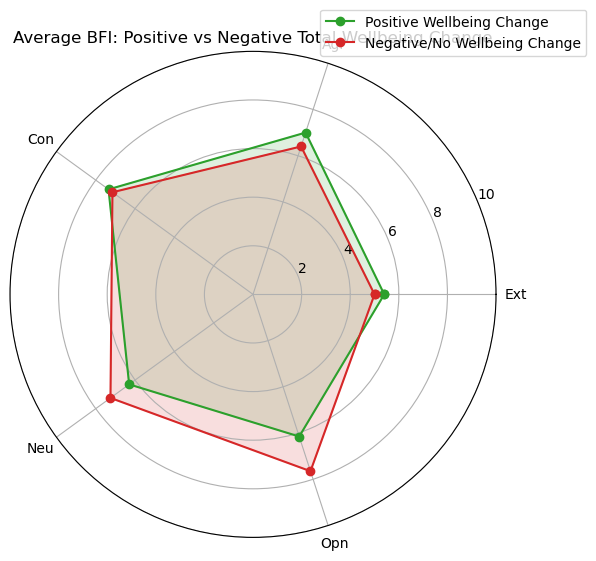

In [116]:
# Identify users with positive and negative/no total wellbeing change
positive_wellbeing_uids = wellbeing_change[wellbeing_change['total_wellbeing_change'] > 0].index
negative_wellbeing_uids = wellbeing_change[wellbeing_change['total_wellbeing_change'] <= 0].index

# Compute average BFI for each group using entry_exit_bfi_mean
positive_wellbeing_bfi_mean = entry_exit_bfi_mean.loc[positive_wellbeing_uids].mean()
negative_wellbeing_bfi_mean = entry_exit_bfi_mean.loc[negative_wellbeing_uids].mean()

print(f"Positive wellbeing change users (n={len(positive_wellbeing_uids)}): {list(positive_wellbeing_uids)}")
print(f"Negative/No wellbeing change users (n={len(negative_wellbeing_uids)}): {list(negative_wellbeing_uids)}")

# Prepare data for radar chart
labels = short_labels  # ['Ext', 'Agr', 'Con', 'Neu', 'Opn']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = positive_wellbeing_bfi_mean.values.tolist()
neg_vals = negative_wellbeing_bfi_mean.values.tolist()
pos_vals += pos_vals[:1]
neg_vals += neg_vals[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='Positive Wellbeing Change', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Negative/No Wellbeing Change', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Average BFI: Positive vs Negative Total Wellbeing Change')
plt.tight_layout()
plt.show()

In [117]:
# Calculate the change in Mindfulness, Self-reflection, and Insight between entry and exit for each user
entry_msi = entry_nos_new_df.set_index('uid')[['mindfulness_total', 'sr_total', 'insight_total']]
exit_msi = exit_nos_new_df.set_index('uid')[['mindfulness_total', 'sr_total', 'insight_total']]

# Align indices to users present in both entry and exit
common_uids = entry_msi.index.intersection(exit_msi.index)
msi_change = exit_msi.loc[common_uids] - entry_msi.loc[common_uids]
msi_change = msi_change.rename(columns=lambda x: f"{x}_change")

msi_change['total_msi_change'] = msi_change['mindfulness_total_change'] + msi_change['sr_total_change'] + msi_change['insight_total_change']

msi_change

,mindfulness_total_change,sr_total_change,insight_total_change,total_msi_change
uid,,,,
t0002@sreflect,1,0,-9,-8
t0007@sreflect,6,2,8,16
t0006@sreflect,13,5,-1,17
t0019@sreflect,-6,5,-5,-6
t0003@sreflect,-1,-1,3,1
t0005@sreflect,3,7,6,16
t0015@sreflect,2,4,3,9
t0004@sreflect,2,0,5,7
t0016@sreflect,0,-2,9,7


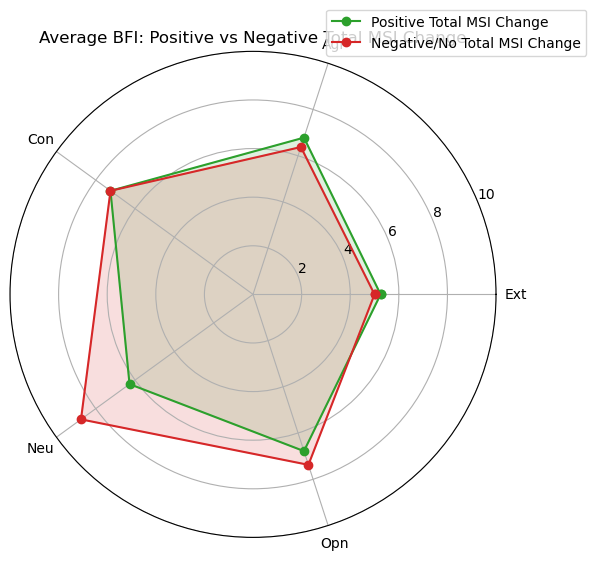

In [118]:
# Identify users with positive and negative total MSI change
positive_msi_uids = msi_change[msi_change['total_msi_change'] > 0].index
negative_msi_uids = msi_change[msi_change['total_msi_change'] <= 0].index

# Compute average BFI for each group using entry_exit_bfi_mean
positive_msi_bfi_mean = entry_exit_bfi_mean.loc[positive_msi_uids].mean()
negative_msi_bfi_mean = entry_exit_bfi_mean.loc[negative_msi_uids].mean()

# Prepare data for radar chart
labels = short_labels  # ['Ext', 'Agr', 'Con', 'Neu', 'Opn']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = positive_msi_bfi_mean.values.tolist()
neg_vals = negative_msi_bfi_mean.values.tolist()
pos_vals += pos_vals[:1]
neg_vals += neg_vals[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='Positive Total MSI Change', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Negative/No Total MSI Change', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Average BFI: Positive vs Negative Total MSI Change')
plt.tight_layout()
plt.show()

## Social and Interpersonal Wellbeing

In [119]:
# Calculate the change in social_provision and loneliness between entry and exit for each user
entry_social = entry_nos_new_df.set_index('uid')[['sps_total', 'ls_total']]
exit_social = exit_nos_new_df.set_index('uid')[['sps_total', 'ls_total']]

# Align indices to users present in both entry and exit
common_uids = entry_social.index.intersection(exit_social.index)
social_change = exit_social.loc[common_uids] - entry_social.loc[common_uids]
social_change = social_change.rename(columns=lambda x: f"{x}_change")
social_change['total_social_change'] = social_change['sps_total_change'] - social_change['ls_total_change']
social_change

,sps_total_change,ls_total_change,total_social_change
uid,,,
t0002@sreflect,1,-4,5
t0007@sreflect,2,0,2
t0006@sreflect,-1,6,-7
t0019@sreflect,-2,3,-5
t0003@sreflect,6,-1,7
t0005@sreflect,-8,1,-9
t0015@sreflect,-7,3,-10
t0004@sreflect,0,0,0
t0016@sreflect,-1,2,-3



Effect Size Analysis (Cohen's d with 95% Bootstrap CIs):
            Trait  Cohens_d    CI_low  CI_high  Mean_Responders  Mean_NonResponders
     Extraversion -0.384461 -2.354167 0.937500           4.7500            5.500000
    Agreeableness -0.612372 -1.833333 0.333333           6.2500            7.000000
Conscientiousness  0.142374 -1.020833 1.479167           7.3750            7.166667
      Neuroticism -0.244545 -2.083333 1.125000           6.5000            6.958333
         Openness  0.432269 -0.500000 1.916667           7.3125            6.625000


Spearman Correlations (Trait vs Total Social Change):
            Trait  Spearman_rho
     Extraversion     -0.136743
    Agreeableness      0.038570
Conscientiousness      0.148082
      Neuroticism     -0.209331
         Openness      0.011091


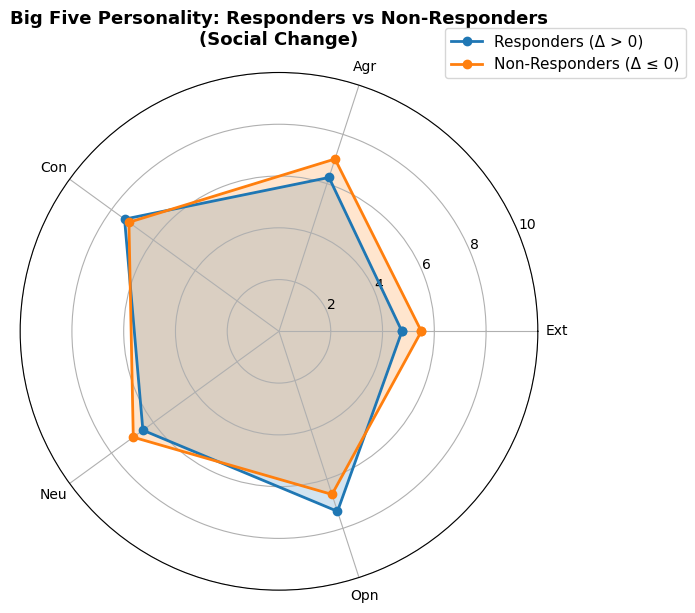

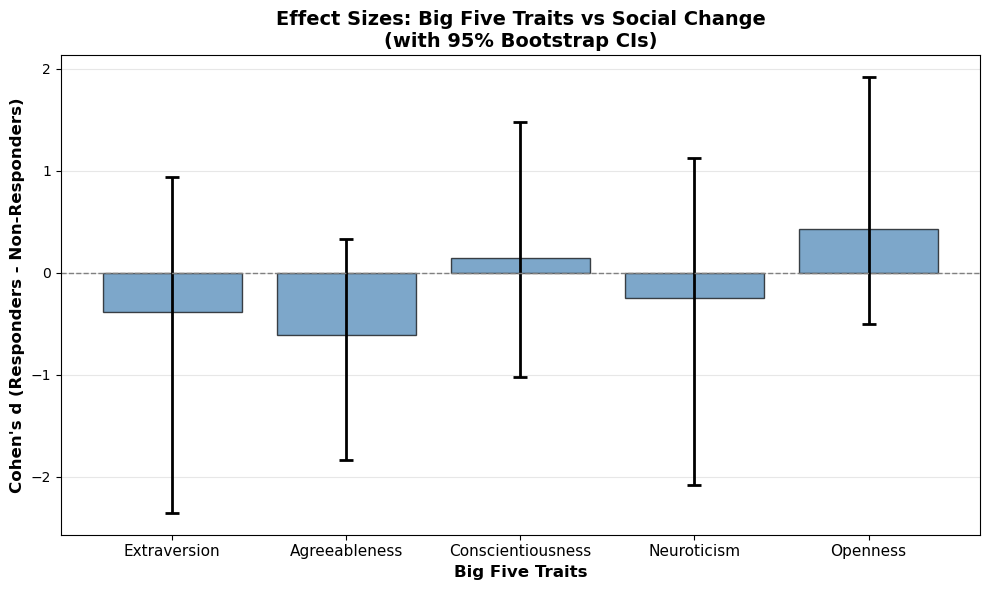



Sample sizes: Responders (n=8), Non-Responders (n=12)


In [120]:
from scipy.stats import spearmanr

# Effect size analysis: Cohen's d, bootstrap CIs, and correlations for Big Five vs social change

def cohens_d(group1, group2):
    """Compute Cohen's d effect size between two groups."""
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(ddof=1), group2.var(ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (group1.mean() - group2.mean()) / pooled_std if pooled_std > 0 else 0

def bootstrap_ci(group1, group2, n_bootstrap=5000, ci=95):
    """Compute bootstrap confidence interval for mean difference."""
    diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        diffs.append(sample1.mean() - sample2.mean())
    lower = np.percentile(diffs, (100 - ci) / 2)
    upper = np.percentile(diffs, 100 - (100 - ci) / 2)
    return lower, upper

# Split into responders and non-responders
responders = social_change[social_change['total_social_change'] > 0].index
non_responders = social_change[social_change['total_social_change'] <= 0].index

# Get BFI data for each group
bfi_responders = entry_exit_bfi_mean.loc[responders]
bfi_non_responders = entry_exit_bfi_mean.loc[non_responders]

# Compute effect sizes and bootstrap CIs for each trait
bfi_traits = ['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']
trait_labels = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

results = []
for trait, label in zip(bfi_traits, trait_labels):
    resp_vals = bfi_responders[trait].values
    non_resp_vals = bfi_non_responders[trait].values
    
    d = cohens_d(resp_vals, non_resp_vals)
    ci_low, ci_high = bootstrap_ci(resp_vals, non_resp_vals, n_bootstrap=5000)
    mean_resp = resp_vals.mean()
    mean_nonresp = non_resp_vals.mean()
    
    results.append({
        'Trait': label,
        'Cohens_d': d,
        'CI_low': ci_low,
        'CI_high': ci_high,
        'Mean_Responders': mean_resp,
        'Mean_NonResponders': mean_nonresp
    })

effect_size_df = pd.DataFrame(results)
print("\nEffect Size Analysis (Cohen's d with 95% Bootstrap CIs):")
print(effect_size_df.to_string(index=False))

# Compute Spearman correlations between Big Five traits and total_social_change
print("\n\nSpearman Correlations (Trait vs Total Social Change):")
corr_results = []
for trait, label in zip(bfi_traits, trait_labels):
    trait_vals = entry_exit_bfi_mean[trait]
    delta_vals = social_change['total_social_change']
    # Align indices
    common_idx = trait_vals.index.intersection(delta_vals.index)
    rho, _ = spearmanr(trait_vals.loc[common_idx], delta_vals.loc[common_idx])
    corr_results.append({'Trait': label, 'Spearman_rho': rho})

corr_df = pd.DataFrame(corr_results)
print(corr_df.to_string(index=False))

# Visualization (a): Radar plot comparing responders vs non-responders
mean_resp = bfi_responders.mean()
mean_nonresp = bfi_non_responders.mean()

labels_radar = short_labels
angles = np.linspace(0, 2 * np.pi, len(labels_radar), endpoint=False).tolist()
angles += angles[:1]

resp_vals_plot = mean_resp.values.tolist() + [mean_resp.values[0]]
nonresp_vals_plot = mean_nonresp.values.tolist() + [mean_nonresp.values[0]]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.plot(angles, resp_vals_plot, 'o-', label='Responders (Δ > 0)', color='tab:blue', linewidth=2)
ax.fill(angles, resp_vals_plot, alpha=0.2, color='tab:blue')
ax.plot(angles, nonresp_vals_plot, 'o-', label='Non-Responders (Δ ≤ 0)', color='tab:orange', linewidth=2)
ax.fill(angles, nonresp_vals_plot, alpha=0.2, color='tab:orange')
ax.set_thetagrids(np.degrees(angles[:-1]), labels_radar)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.set_title('Big Five Personality: Responders vs Non-Responders\n(Social Change)', 
             fontsize=13, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Visualization (b): Bar chart of Cohen's d with bootstrap CIs
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(trait_labels))
cohens_d_vals = effect_size_df['Cohens_d'].values
ci_errors = np.array([
    cohens_d_vals - effect_size_df['CI_low'].values,
    effect_size_df['CI_high'].values - cohens_d_vals
])

bars = ax.bar(x_pos, cohens_d_vals, color='steelblue', alpha=0.7, edgecolor='black')
ax.errorbar(x_pos, cohens_d_vals, yerr=ci_errors, fmt='none', ecolor='black', 
            capsize=5, capthick=2, linewidth=2)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_xlabel('Big Five Traits', fontsize=12, fontweight='bold')
ax.set_ylabel("Cohen's d (Responders - Non-Responders)", fontsize=12, fontweight='bold')
ax.set_title("Effect Sizes: Big Five Traits vs Social Change\n(with 95% Bootstrap CIs)", 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(trait_labels, fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n\nSample sizes: Responders (n={len(responders)}), Non-Responders (n={len(non_responders)})")

Positive social change users (n=8): ['t0002@sreflect', 't0007@sreflect', 't0003@sreflect', 't0008@sreflect', 't0011@sreflect', 't0018@sreflect', 't0022@sreflect', 't0017@sreflect']
Negative/No social change users (n=12): ['t0006@sreflect', 't0019@sreflect', 't0005@sreflect', 't0015@sreflect', 't0004@sreflect', 't0016@sreflect', 't0009@sreflect', 't0012@sreflect', 't0014@sreflect', 't0010@sreflect', 't0013@sreflect', 't0020@sreflect']


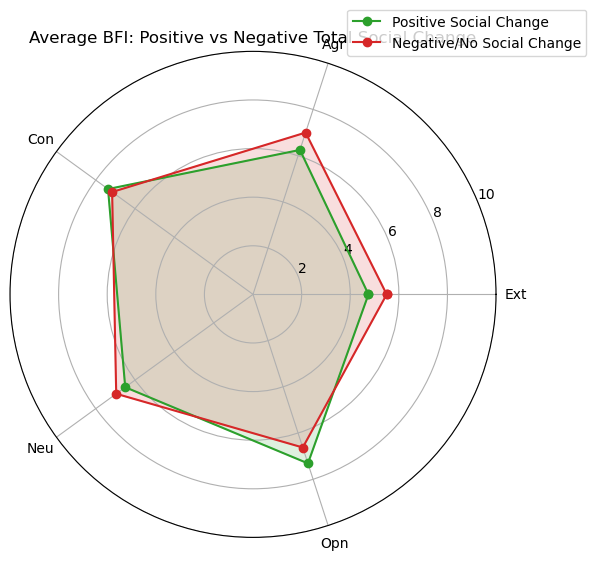

In [121]:
# Identify users with positive and negative/no total social change
positive_social_uids = social_change[social_change['total_social_change'] > 0].index
negative_social_uids = social_change[social_change['total_social_change'] <= 0].index

# Compute average BFI for each group
positive_social_bfi_mean = entry_exit_bfi_mean.loc[positive_social_uids].mean()
negative_social_bfi_mean = entry_exit_bfi_mean.loc[negative_social_uids].mean()

print(f"Positive social change users (n={len(positive_social_uids)}): {list(positive_social_uids)}")
print(f"Negative/No social change users (n={len(negative_social_uids)}): {list(negative_social_uids)}")

# Prepare radar chart
radar_labels = short_labels if 'short_labels' in globals() else ['Ext', 'Agr', 'Con', 'Neu', 'Opn']
angles = np.linspace(0, 2 * np.pi, len(radar_labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = positive_social_bfi_mean.values.tolist()
neg_vals = negative_social_bfi_mean.values.tolist()
pos_vals += pos_vals[:1]
neg_vals += neg_vals[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='Positive Social Change', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Negative/No Social Change', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), radar_labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Average BFI: Positive vs Negative Total Social Change')
plt.tight_layout()
plt.show()

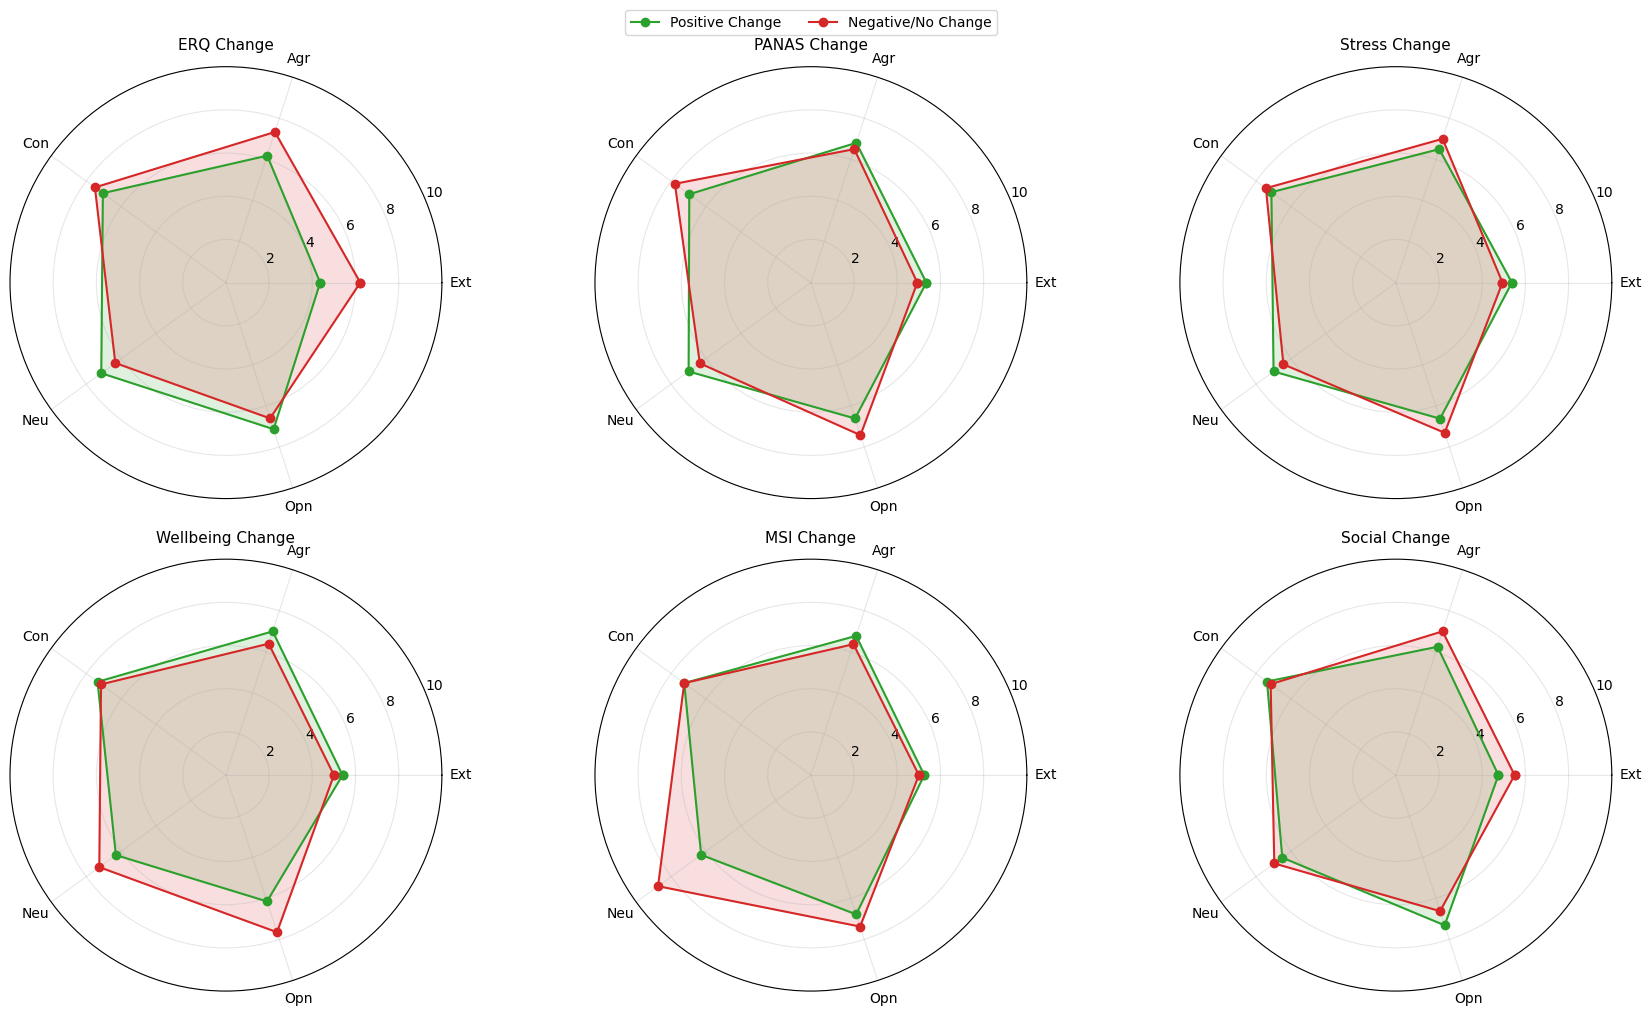

In [156]:
# Plot all radar charts (ERQ, PANAS, Stress, Wellbeing, MSI, Social) in one figure (2 rows x 3 columns)

def plot_radar(ax, pos_mean, neg_mean, title, pos_label, neg_label, labels=short_labels):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    pos_vals = pos_mean.values.tolist() + [pos_mean.values[0]]
    neg_vals = neg_mean.values.tolist() + [neg_mean.values[0]]
    ax.plot(angles, pos_vals, 'o-', label=pos_label, color='tab:green')
    ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
    ax.plot(angles, neg_vals, 'o-', label=neg_label, color='tab:red')
    ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_ylim(0, 10)
    ax.set_title(title, fontsize=11, pad=12)
    ax.grid(True, alpha=0.3)

fig, axes = plt.subplots(2, 3, figsize=(18, 10), subplot_kw=dict(polar=True))
axes = axes.flatten()

charts = [
    ("ERQ Change", positive_erq_bfi_mean, negative_erq_bfi_mean,
     "Positive Change", "Negative/No Change"),
    ("PANAS Change", positive_panas_bfi_mean, negative_panas_bfi_mean,
     "Positive Total PANAS Change", "Negative/No Total PANAS Change"),
    ("Stress Change", positive_stress_bfi_mean, negative_stress_bfi_mean,
     "Positive Total Stress Change", "Negative/No Total Stress Change"),
    ("Wellbeing Change", positive_wellbeing_bfi_mean, negative_wellbeing_bfi_mean,
     "Positive Wellbeing Change", "Negative/No Wellbeing Change"),
    ("MSI Change", positive_msi_bfi_mean, negative_msi_bfi_mean,
     "Positive Total MSI Change", "Negative/No Total MSI Change"),
    ("Social Change", positive_social_bfi_mean, negative_social_bfi_mean,
     "Positive Social Change", "Negative/No Social Change"),
]

for ax, (title, pos_mean, neg_mean, pos_lbl, neg_lbl) in zip(axes, charts):
    plot_radar(ax, pos_mean, neg_mean, title, pos_lbl, neg_lbl)

# Common legend
handles, labels_legend = axes[0].get_legend_handles_labels()
fig.legend(handles, labels_legend, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02), fontsize=10)

plt.tight_layout()
plt.show()

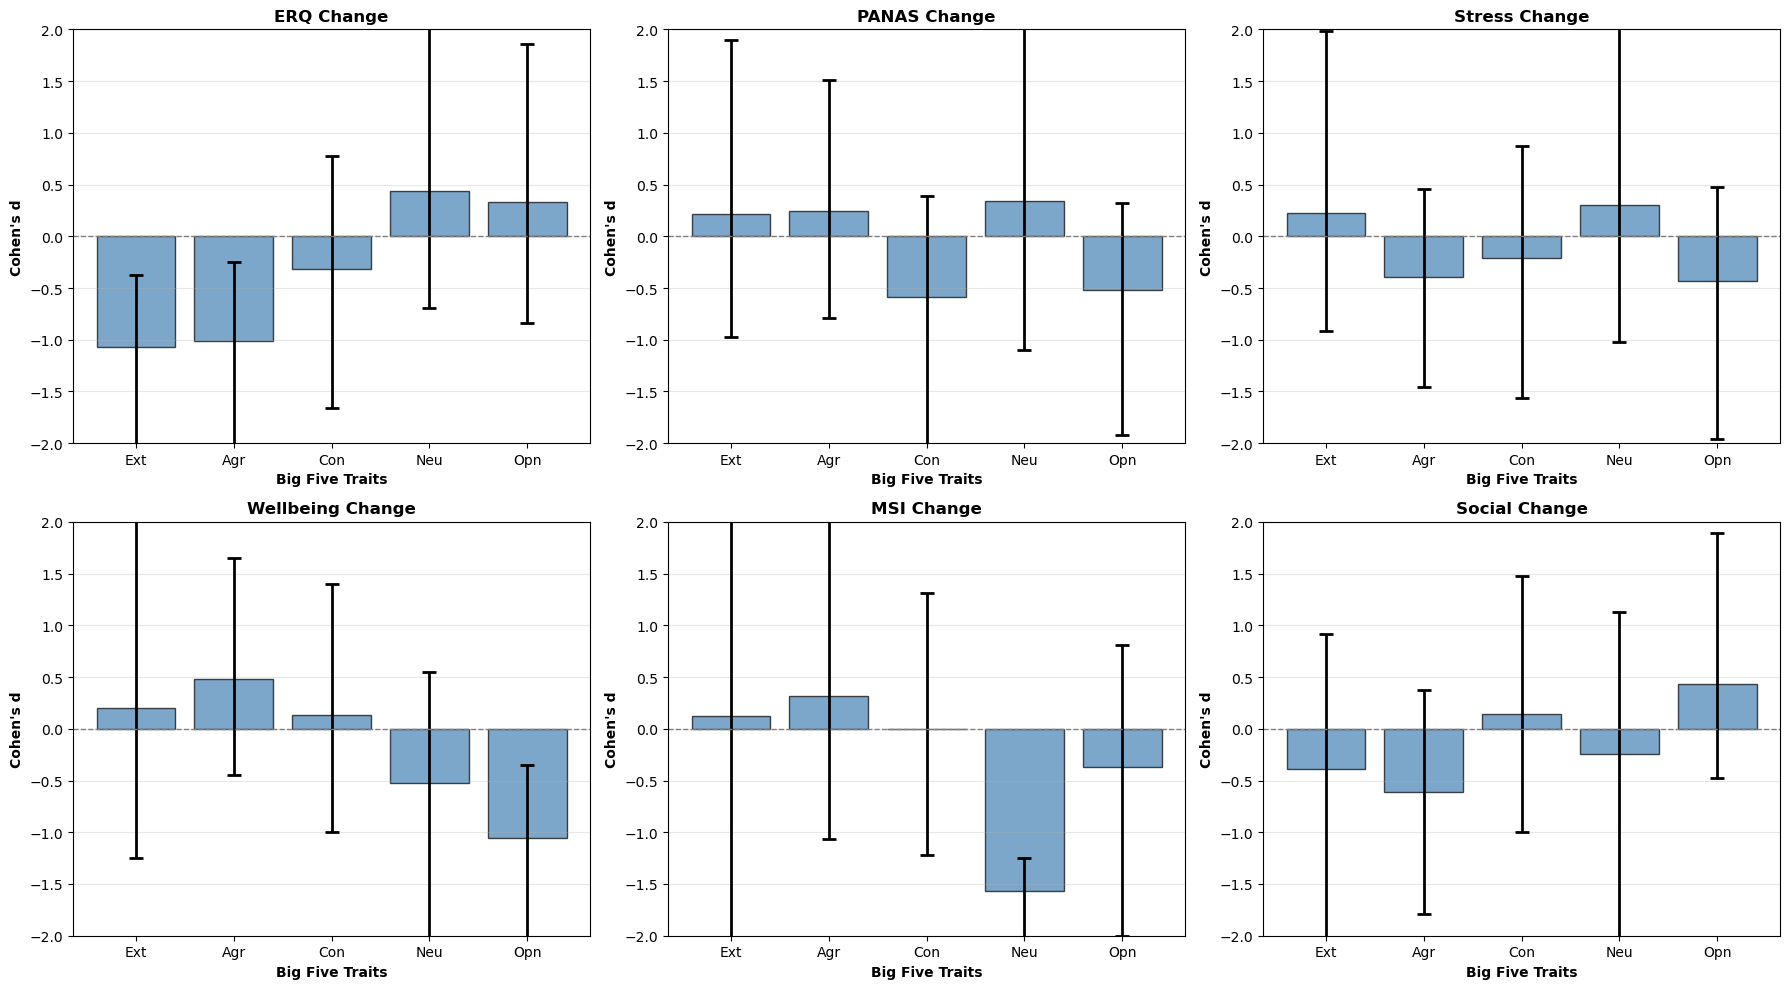

In [155]:
# Create a comprehensive figure with 6 bar charts of Cohen's d for different outcome measures

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Define the outcome measures and their corresponding data
outcome_measures = [
    ("ERQ Change", positive_erq_uids, negative_erq_uids, "Positive ERQ", "Negative/No ERQ"),
    ("PANAS Change", positive_panas_uids, negative_panas_uids, "Positive PANAS", "Negative/No PANAS"),
    ("Stress Change", positive_stress_uids, negative_stress_uids, "Positive Stress", "Negative/No Stress"),
    ("Wellbeing Change", positive_wellbeing_uids, negative_wellbeing_uids, "Positive Wellbeing", "Negative/No Wellbeing"),
    ("MSI Change", positive_msi_uids, negative_msi_uids, "Positive MSI", "Negative/No MSI"),
    ("Social Change", positive_social_uids, negative_social_uids, "Positive Social", "Negative/No Social"),
]

bfi_traits = ['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']
trait_short = ['Ext', 'Agr', 'Con', 'Neu', 'Opn']

for ax_idx, (title, pos_uids, neg_uids, pos_label, neg_label) in enumerate(outcome_measures):
    ax = axes[ax_idx]
    
    # Compute Cohen's d and bootstrap CIs for this outcome measure
    bfi_pos = entry_exit_bfi_mean.loc[pos_uids]
    bfi_neg = entry_exit_bfi_mean.loc[neg_uids]
    
    cohens_d_vals = []
    ci_lows = []
    ci_highs = []
    
    for trait in bfi_traits:
        pos_vals = bfi_pos[trait].values
        neg_vals = bfi_neg[trait].values
        
        d = cohens_d(pos_vals, neg_vals)
        ci_low, ci_high = bootstrap_ci(pos_vals, neg_vals, n_bootstrap=5000)
        
        cohens_d_vals.append(d)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)
    
    # Plot
    x_pos = np.arange(len(trait_short))
    cohens_d_vals = np.array(cohens_d_vals)
    ci_errors = np.array([
        cohens_d_vals - np.array(ci_lows),
        np.array(ci_highs) - cohens_d_vals
    ])
    
    bars = ax.bar(x_pos, cohens_d_vals, color='steelblue', alpha=0.7, edgecolor='black')
    ax.errorbar(x_pos, cohens_d_vals, yerr=ci_errors, fmt='none', ecolor='black', 
                capsize=5, capthick=2, linewidth=2)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    
    ax.set_xlabel('Big Five Traits', fontsize=10, fontweight='bold')
    ax.set_ylabel("Cohen's d", fontsize=10, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(trait_short, fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

In [123]:
# Load apps.csv and filter rows where uid is in entry_nos_new_df['uid']
apps_df = pd.read_csv('apps.csv')
filtered_apps_df = apps_df[apps_df['uid'].isin(entry_nos_new_df['uid'])]
filtered_apps_df.to_csv('filtered_apps.csv', index=False)
print(filtered_apps_df)

        Unnamed: 0                                               data  \
6108          6108       ["com.shannon.qualifiednetworksservice",0,0]   
6109          6109  ["com.google.android.youtube",1706829330948,18...   
6110          6110  ["com.mychime.waveremit.app",1706803243751,179...   
6111          6111             ["com.whatsapp",1706829566956,1445064]   
6112          6112  ["com.google.android.apps.messaging",170682695...   
...            ...                                                ...   
131882      131882         ["com.android.chrome",1714495838455,11724]   
131883      131883  ["com.google.android.apps.nexuslauncher",17144...   
131884      131884            ["com.groupme.android",1714495612426,0]   
131885      131885      ["com.snapchat.android",1714495798019,367726]   
131896      131896  ["com.smallgiantgames.empires",1714500487472,4...   

                               day             uid  
6108           1969-12-31 19:00:00  t0003@sreflect  
6109    2024-02-0

In [124]:
import ast

# Function to parse the 'data' column and expand into separate columns
def expand_app_data(row):
    try:
        app_info = ast.literal_eval(row['data'])
        return pd.Series({
            'app_pkg': app_info[0],
            'timestamp': app_info[1],
            'duration': app_info[2]
        })
    except Exception:
        return pd.Series({'app_pkg': None, 'timestamp': None, 'duration': None})

# Apply the function to each row and join the new columns
expanded_apps_df = filtered_apps_df.join(filtered_apps_df.apply(expand_app_data, axis=1))

# Convert timestamp to datetime if needed
expanded_apps_df['timestamp'] = pd.to_datetime(expanded_apps_df['timestamp'], unit='ms', errors='coerce')
expanded_apps_df = expanded_apps_df.drop(columns=['Unnamed: 0','data'])
expanded_apps_df

,day,uid,app_pkg,timestamp,duration
6108,1969-12-31 19:00:00,t0003@sreflect,com.shannon.qualifiednetworksservice,1970-01-01 00:00:00.000,0
6109,2024-02-01 18:15:30.651000,t0003@sreflect,com.google.android.youtube,2024-02-01 23:15:30.948,188143
6110,2024-02-01 11:00:43.665000,t0003@sreflect,com.mychime.waveremit.app,2024-02-01 16:00:43.751,179789
6111,2024-02-01 18:19:26.930000,t0003@sreflect,com.whatsapp,2024-02-01 23:19:26.956,1445064
6112,2024-02-01 17:35:52.859000,t0003@sreflect,com.google.android.apps.messaging,2024-02-01 22:35:52.885,553828
...,...,...,...,...,...
131882,2024-04-30 09:50:38.454000,t0005@sreflect,com.android.chrome,2024-04-30 16:50:38.455,11724
131883,2024-04-30 09:50:38.571000,t0005@sreflect,com.google.android.apps.nexuslauncher,2024-04-30 16:50:38.983,80792
131884,2024-04-30 09:46:52.426000,t0005@sreflect,com.groupme.android,2024-04-30 16:46:52.426,0
131885,2024-04-30 09:49:57.855000,t0005@sreflect,com.snapchat.android,2024-04-30 16:49:58.019,367726


In [130]:
# Remove rows where timestamp is before 2024
expanded_apps_df = expanded_apps_df[expanded_apps_df['timestamp'].dt.year >= 2024]
expanded_apps_df

,day,uid,app_pkg,timestamp,duration,date
6109,2024-02-01 18:15:30.651000,t0003@sreflect,com.google.android.youtube,2024-02-01 23:15:30.948,188143,2024-02-01
6110,2024-02-01 11:00:43.665000,t0003@sreflect,com.mychime.waveremit.app,2024-02-01 16:00:43.751,179789,2024-02-01
6111,2024-02-01 18:19:26.930000,t0003@sreflect,com.whatsapp,2024-02-01 23:19:26.956,1445064,2024-02-01
6112,2024-02-01 17:35:52.859000,t0003@sreflect,com.google.android.apps.messaging,2024-02-01 22:35:52.885,553828,2024-02-01
6113,2024-02-01 17:57:30.510000,t0003@sreflect,edu.dartmouth.mlife,2024-02-01 22:57:30.540,226615,2024-02-01
...,...,...,...,...,...,...
131882,2024-04-30 09:50:38.454000,t0005@sreflect,com.android.chrome,2024-04-30 16:50:38.455,11724,2024-04-30
131883,2024-04-30 09:50:38.571000,t0005@sreflect,com.google.android.apps.nexuslauncher,2024-04-30 16:50:38.983,80792,2024-04-30
131884,2024-04-30 09:46:52.426000,t0005@sreflect,com.groupme.android,2024-04-30 16:46:52.426,0,2024-04-30
131885,2024-04-30 09:49:57.855000,t0005@sreflect,com.snapchat.android,2024-04-30 16:49:58.019,367726,2024-04-30


In [131]:
# Count number of app usage events ("clicks") per user per day
expanded_apps_df['date'] = expanded_apps_df['timestamp'].dt.date
click_counts = (
    expanded_apps_df
    .groupby(['uid', 'date'])
    .size()
    .reset_index(name='click_count')
)
click_counts

,uid,date,click_count
0,t0002@sreflect,2024-02-01,14
1,t0002@sreflect,2024-02-02,129
2,t0002@sreflect,2024-02-03,99
3,t0002@sreflect,2024-02-04,106
4,t0002@sreflect,2024-02-05,167
...,...,...,...
1053,t0022@sreflect,2024-03-21,139
1054,t0022@sreflect,2024-03-22,105
1055,t0022@sreflect,2024-03-23,90
1056,t0022@sreflect,2024-03-24,116


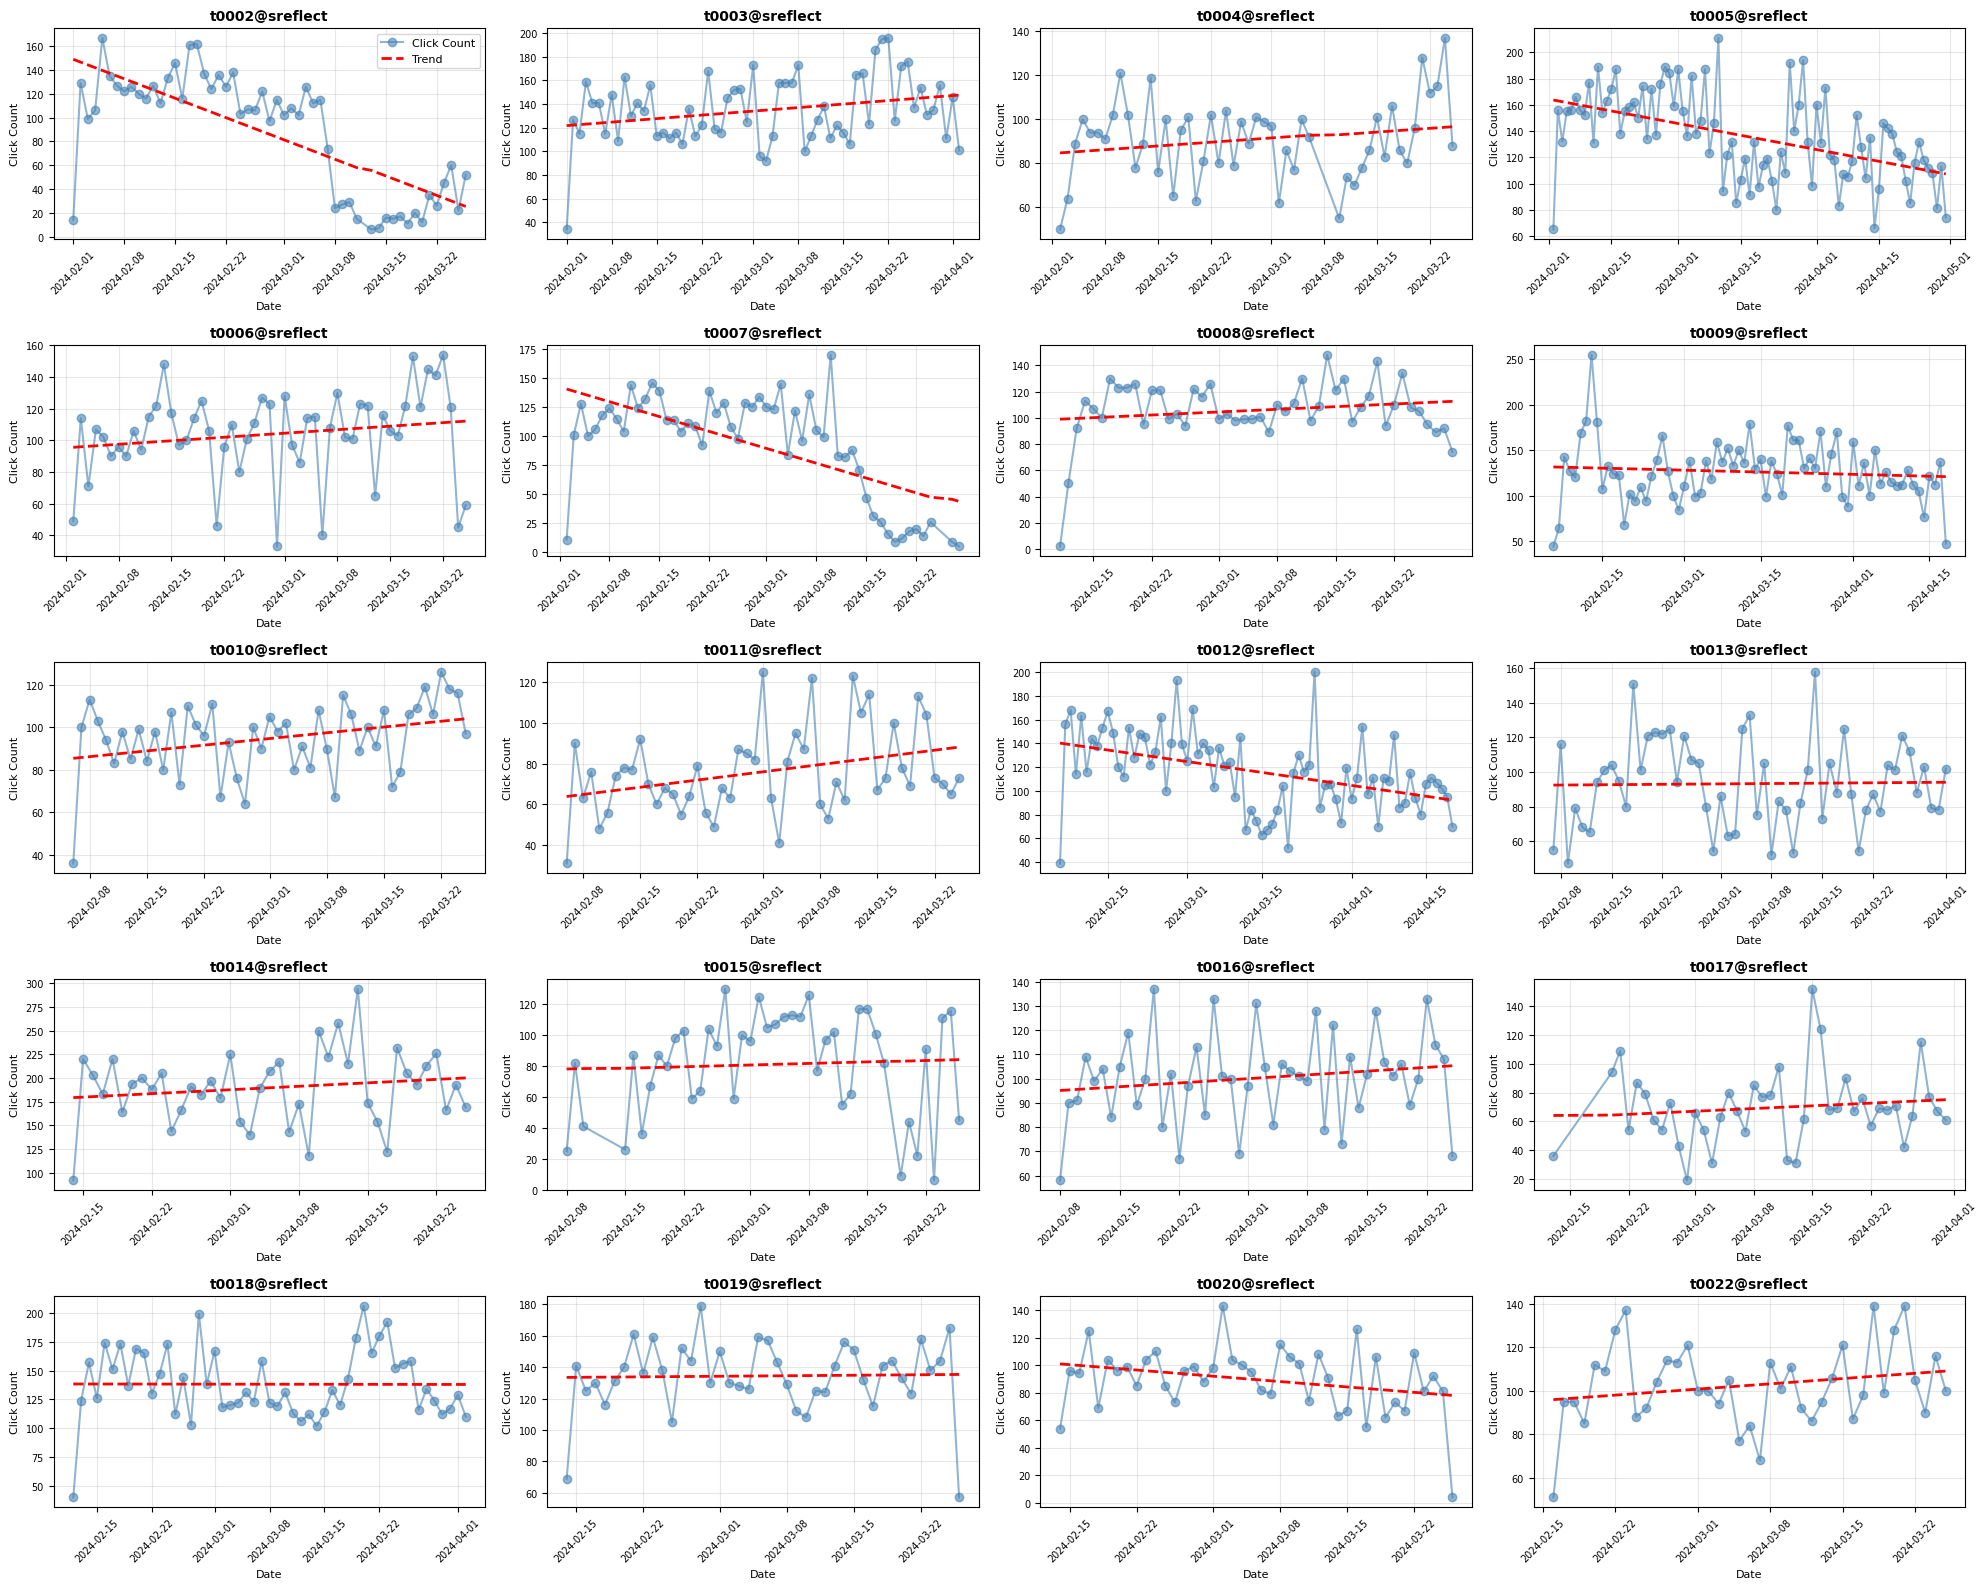

In [135]:
# Plot time series of click_counts for each uid with trend lines
fig, axes = plt.subplots(5, 4, figsize=(20, 16))
axes = axes.flatten()

for idx, uid in enumerate(uids):
    ax = axes[idx]
    user_data = click_counts[click_counts['uid'] == uid].copy()
    user_data['date'] = pd.to_datetime(user_data['date'])
    user_data = user_data.sort_values('date').reset_index(drop=True)
    
    # Convert date to numeric for trend line
    x_numeric = np.arange(len(user_data))
    y = user_data['click_count'].values
    
    # Fit polynomial trend line
    z = np.polyfit(x_numeric, y, 1)
    p = np.poly1d(z)
    trend_line = p(x_numeric)
    
    # Plot
    ax.plot(user_data['date'], y, 'o-', alpha=0.6, label='Click Count', color='steelblue')
    ax.plot(user_data['date'], trend_line, '--', linewidth=2, label='Trend', color='red')
    ax.set_title(f'{uid}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Date', fontsize=8)
    ax.set_ylabel('Click Count', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.grid(True, alpha=0.3)
    if idx == 0:
        ax.legend(fontsize=8)

# Remove empty subplots
for j in range(len(uids), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [137]:
from scipy.stats import linregress

trend_stats = []

for uid in uids:
    user_data = click_counts[click_counts['uid'] == uid].copy()
    user_data = user_data.sort_values('date').reset_index(drop=True)
    # Convert date to ordinal for regression
    x = pd.to_datetime(user_data['date']).map(lambda d: d.toordinal()).values
    y = user_data['click_count'].values
    if len(x) > 1:
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        trend_stats.append({
            'uid': uid,
            'slope': slope,
            'p_value': p_value,
            'significant': p_value < 0.05
        })
    else:
        trend_stats.append({
            'uid': uid,
            'slope': None,
            'p_value': None,
            'significant': False
        })

trend_stats_df = pd.DataFrame(trend_stats)
print(trend_stats_df)

               uid     slope       p_value  significant
0   t0002@sreflect -2.299907  2.653140e-10         True
1   t0003@sreflect  0.423560  3.488557e-02         True
2   t0004@sreflect  0.218609  1.831312e-01        False
3   t0005@sreflect -0.640024  5.645790e-07         True
4   t0006@sreflect  0.318013  2.084139e-01        False
5   t0007@sreflect -1.822284  3.089363e-07         True
6   t0008@sreflect  0.289134  2.352360e-01        False
7   t0009@sreflect -0.147908  4.299935e-01        False
8   t0010@sreflect  0.386939  2.271194e-02         True
9   t0011@sreflect  0.505204  1.640207e-02         True
10  t0012@sreflect -0.647425  9.822224e-05         True
11  t0013@sreflect  0.030375  8.888252e-01        False
12  t0014@sreflect  0.518467  3.206204e-01        False
13  t0015@sreflect  0.151896  7.027873e-01        False
14  t0016@sreflect  0.221901  2.663590e-01        False
15  t0017@sreflect  0.287014  3.765240e-01        False
16  t0018@sreflect -0.008235  9.772444e-01      

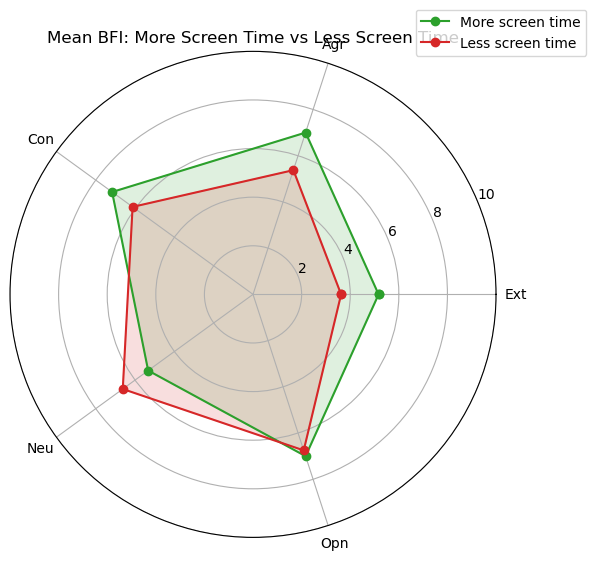

In [150]:
# Identify uids with significant positive and negative trends
true_positive_uids = trend_stats_df[(trend_stats_df['significant']) & (trend_stats_df['slope'] > 0)]['uid']
true_negative_uids = trend_stats_df[(trend_stats_df['significant']) & (trend_stats_df['slope'] < 0)]['uid']

# Compute mean BFI for each group
true_positive_bfi_mean = entry_exit_bfi_mean.loc[true_positive_uids].mean()
true_negative_bfi_mean = entry_exit_bfi_mean.loc[true_negative_uids].mean()

# Prepare radar chart
labels = short_labels
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

pos_vals = true_positive_bfi_mean.values.tolist() + [true_positive_bfi_mean.values[0]]
neg_vals = true_negative_bfi_mean.values.tolist() + [true_negative_bfi_mean.values[0]]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, pos_vals, 'o-', label='More screen time', color='tab:green')
ax.fill(angles, pos_vals, alpha=0.15, color='tab:green')
ax.plot(angles, neg_vals, 'o-', label='Less screen time', color='tab:red')
ax.fill(angles, neg_vals, alpha=0.15, color='tab:red')
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 10)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.title('Mean BFI: More Screen Time vs Less Screen Time')
plt.tight_layout()
plt.show()

Effect Size Analysis for Screen Time Trends (Cohen's d with 95% Bootstrap CIs):
            Trait  Cohens_d    CI_low  CI_high  Mean_MoreScreen  Mean_LessScreen
     Extraversion  1.309965  1.000000 3.384890         5.961538         3.785714
    Agreeableness  1.311725  0.329670 2.467033         7.192308         5.785714
Conscientiousness  1.061095  0.329670 2.324176         7.730769         6.357143
      Neuroticism -0.125314 -1.824313 1.379258         6.692308         6.928571
         Openness  0.384628 -0.807692 2.197940         7.115385         6.500000


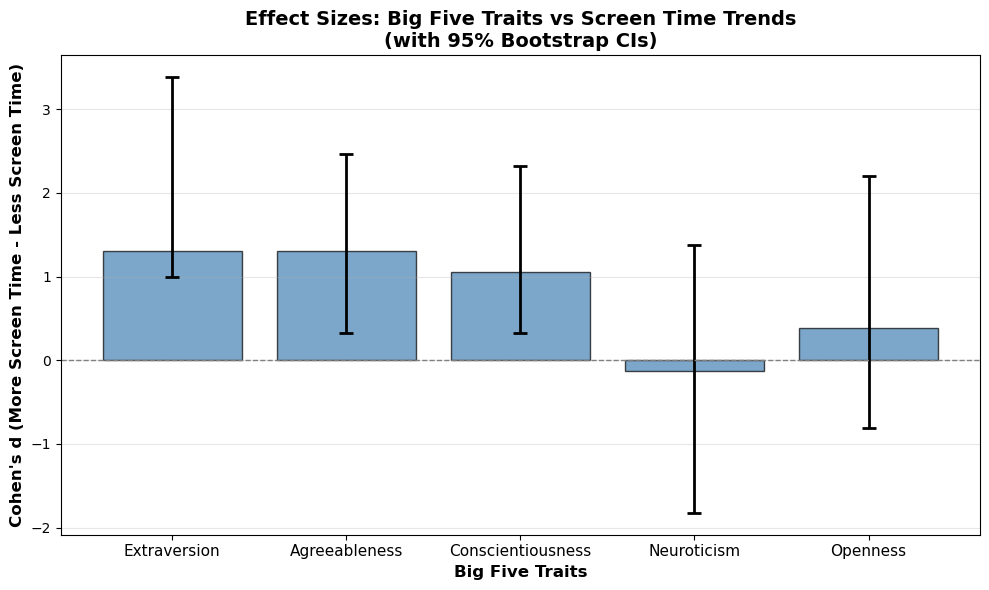



Sample sizes: More Screen Time (n=13), Less Screen Time (n=7)


In [154]:
# Effect size analysis: Cohen's d with bootstrap CIs for screen time trends

# Split into more screen time and less screen time groups
more_screen_uids = trend_stats_df[(trend_stats_df['slope'] > 0)]['uid']
less_screen_uids = trend_stats_df[(trend_stats_df['slope'] < 0)]['uid']

# Get BFI data for each group
bfi_more_screen = entry_exit_bfi_mean.loc[more_screen_uids]
bfi_less_screen = entry_exit_bfi_mean.loc[less_screen_uids]

# Compute effect sizes and bootstrap CIs for each trait
bfi_traits = ['bfi_extraversion', 'bfi_agreeableness', 'bfi_consc', 'bfi_neuro', 'bfi_open']
trait_labels = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']

screen_results = []
for trait, label in zip(bfi_traits, trait_labels):
    more_vals = bfi_more_screen[trait].values
    less_vals = bfi_less_screen[trait].values
    
    d = cohens_d(more_vals, less_vals)
    ci_low, ci_high = bootstrap_ci(more_vals, less_vals, n_bootstrap=5000)
    
    screen_results.append({
        'Trait': label,
        'Cohens_d': d,
        'CI_low': ci_low,
        'CI_high': ci_high,
        'Mean_MoreScreen': more_vals.mean(),
        'Mean_LessScreen': less_vals.mean()
    })

screen_effect_size_df = pd.DataFrame(screen_results)
print("Effect Size Analysis for Screen Time Trends (Cohen's d with 95% Bootstrap CIs):")
print(screen_effect_size_df.to_string(index=False))

# Visualization: Bar chart of Cohen's d with bootstrap CIs
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(trait_labels))
cohens_d_vals = screen_effect_size_df['Cohens_d'].values
ci_errors = np.array([
    cohens_d_vals - screen_effect_size_df['CI_low'].values,
    screen_effect_size_df['CI_high'].values - cohens_d_vals
])

bars = ax.bar(x_pos, cohens_d_vals, color='steelblue', alpha=0.7, edgecolor='black')
ax.errorbar(x_pos, cohens_d_vals, yerr=ci_errors, fmt='none', ecolor='black', 
            capsize=5, capthick=2, linewidth=2)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_xlabel('Big Five Traits', fontsize=12, fontweight='bold')
ax.set_ylabel("Cohen's d (More Screen Time - Less Screen Time)", fontsize=12, fontweight='bold')
ax.set_title("Effect Sizes: Big Five Traits vs Screen Time Trends\n(with 95% Bootstrap CIs)", 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(trait_labels, fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n\nSample sizes: More Screen Time (n={len(more_screen_uids)}), Less Screen Time (n={len(less_screen_uids)})")